# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn import metrics 
from sklearn.model_selection import  train_test_split, GridSearchCV
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings("ignore")

---
## 2. Load data

In [2]:
date_cols=['date_activ','date_end','date_modif_prod','date_renewal']
df = pd.read_csv('clean_data_after_eda.csv',parse_dates=date_cols)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-01-11,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-07-03,2010-01-13,2015-09-03,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-01-11,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14605 non-null  object        
 1   channel_sales                   14605 non-null  object        
 2   cons_12m                        14605 non-null  int64         
 3   cons_gas_12m                    14605 non-null  int64         
 4   cons_last_month                 14605 non-null  int64         
 5   date_activ                      14605 non-null  datetime64[ns]
 6   date_end                        14605 non-null  datetime64[ns]
 7   date_modif_prod                 14605 non-null  datetime64[ns]
 8   date_renewal                    14605 non-null  datetime64[ns]
 9   forecast_cons_12m               14605 non-null  float64       
 10  forecast_cons_year              14605 non-null  int64         
 11  fo

In [5]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,...,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085,...,0.139312,0.051310,0.028568,43.058161,9.483665,6.115566,43.197473,9.534975,6.144134,0.097159
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140,...,0.024318,0.049501,0.036376,4.668200,12.139506,7.830408,4.683855,12.179014,7.866460,0.296184
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,0.119405,0.000000,0.000000,40.728885,0.000000,0.000000,40.848595,0.000000,0.000000,0.000000
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378,...,0.144757,0.084305,0.000000,44.355820,0.000000,0.000000,44.502379,0.084305,0.000000,0.000000
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378,...,0.147983,0.100491,0.073719,44.444710,24.437330,16.291555,44.592310,24.537821,16.365180,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,0.276238,0.196029,0.103502,59.444710,36.490689,17.291555,59.720948,36.610036,17.382386,1.000000


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [8]:
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-01-11,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-07-03,2010-01-13,2015-09-03,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


## Feature Engineering 

In [9]:
df["tenure"] = ((df["date_end"]-df["date_activ"])/ np.timedelta64(1, "Y")).astype(int)

In [10]:
tenure = df[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

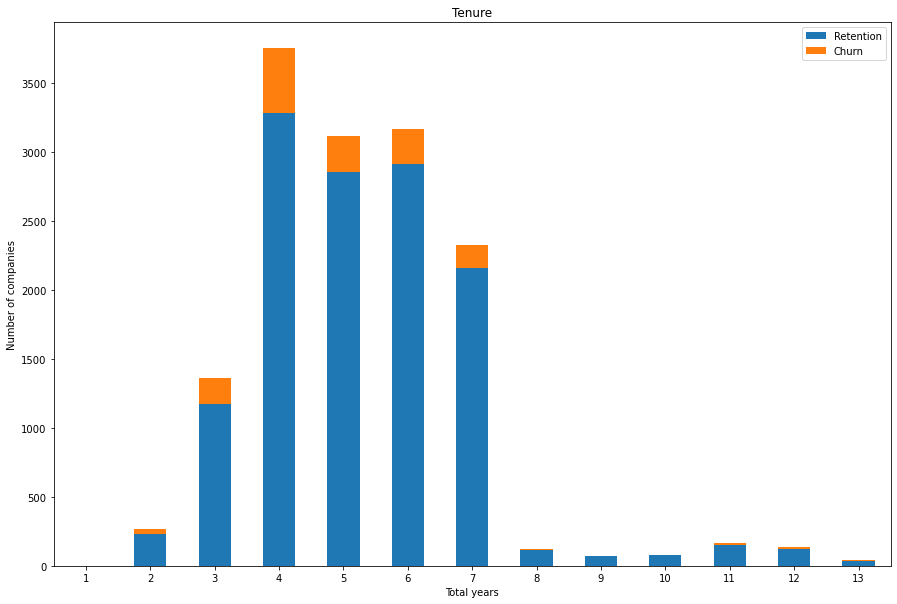

In [11]:
tenure.plot(kind="bar", figsize=(15, 10), stacked=True, rot=0, title= "Tenure")
plt.legend(["Retention", "Churn"], loc="upper right")
plt.ylabel("Number of companies")
plt.xlabel("Total years")
plt.show()

We can see that the most of the companies which are churing have had long contract duration. One of the reason could be they did not get any benefit even after maintaing contract for so long.

In [12]:
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

df = df.drop(columns=date_columns)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0,1.78,0.114481,...,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0,16.27,0.145711,...,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0,38.72,0.165794,...,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779,6
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0,19.83,0.146694,...,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,6
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0,131.73,0.116900,...,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916,6


## Transforming Data

We have 3 categorical columns that we need to convert : channel_sales, has_gas, origin_up

In [13]:
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

Last 3 categorical values are very low and are creatig data imbalance so we will remove them.

In [14]:
index_names = df[ (df['channel_sales'] == 'sddiedcslfslkckwlfkdpoeeailfpeds') |  (df['channel_sales'] == 'epumfxlbckeskwekxbiuasklxalciiuu') | (df['channel_sales'] == 'fixdbufsefwooaasfcxdxadsiekoceaa')].index

In [15]:
index_names

Int64Index([  347,  1336,  1889,  2907,  3461,  4359,  4507,  4876,  6597,
             8594,  9384, 10828, 11126, 11404, 12263, 14484],
           dtype='int64')

In [16]:
df.drop(index_names, inplace = True)
  
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
Name: channel_sales, dtype: int64

In [17]:
df['has_gas'].value_counts()

f    11940
t     2649
Name: has_gas, dtype: int64

We will need to convert these values into numerical value because machine learning model only understand numerical data.

In [18]:
df['has_gas']=df['has_gas'].replace(['t','f'],[1,0])

df['has_gas'].value_counts()

0    11940
1     2649
Name: has_gas, dtype: int64

In [19]:
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7093
kamkkxfxxuwbdslkwifmmcsiusiuosws    4292
ldkssxwpmemidmecebumciepifcamkci    3137
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Last 3 categorical values are very low and are creatig data imbalance so we will remove them.

In [20]:
index_names = df[ (df['origin_up'] == 'MISSING') |  (df['origin_up'] == 'usapbepcfoloekilkwsdiboslwaxobdp') | (df['origin_up'] == 'ewxeelcelemmiwuafmddpobolfuxioce')].index

In [21]:
index_names

Int64Index([   17,   158,   357,   499,   896,  1094,  1148,  1224,  1301,
             1684,  1777,  1857,  1924,  2159,  2188,  2678,  2724,  2758,
             2801,  2829,  3540,  3802,  4069,  4450,  4611,  4705,  4827,
             4852,  4927,  4957,  4977,  5060,  5078,  5080,  5155,  5161,
             5272,  5597,  5794,  6223,  6474,  6746,  6964,  6985,  7573,
             7709,  8381,  8388,  8489,  8566,  8636,  9126,  9628,  9902,
            10146, 10264, 10476, 10632, 10745, 11297, 12396, 12450, 12761,
            13243, 13313, 14227, 14351],
           dtype='int64')

In [22]:
df.drop(index_names, inplace = True)
  
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7093
kamkkxfxxuwbdslkwifmmcsiusiuosws    4292
ldkssxwpmemidmecebumciepifcamkci    3137
Name: origin_up, dtype: int64

In [23]:
df = pd.get_dummies(df, columns = ['channel_sales', 'origin_up'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,offpeak_diff_dec_january_power,tenure,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0,1.78,0.114481,0.098142,...,3.700961,3,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0,16.27,0.145711,0.000000,...,0.177779,7,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0,38.72,0.165794,0.087899,...,0.177779,6,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0,19.83,0.146694,0.000000,...,0.177779,6,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0,131.73,0.116900,0.100015,...,0.162916,6,1,0,0,0,0,1,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14522 entries, 0 to 14604
Data columns (total 58 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14522 non-null  object 
 1   cons_12m                                        14522 non-null  int64  
 2   cons_gas_12m                                    14522 non-null  int64  
 3   cons_last_month                                 14522 non-null  int64  
 4   forecast_cons_12m                               14522 non-null  float64
 5   forecast_cons_year                              14522 non-null  int64  
 6   forecast_discount_energy                        14522 non-null  int64  
 7   forecast_meter_rent_12m                         14522 non-null  float64
 8   forecast_price_energy_off_peak                  14522 non-null  float64
 9   forecast_price_energy_peak             

## Transforming and Processing Numerical Data

In [25]:
df.select_dtypes( ['int','float']).columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2',
       'mean_6m_price_p3', 'mean_3m_price_p1_var', 'mean_3m_price_p2_var',
       'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_3m_pri

In [26]:
num_df = df[[
'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak'
]]

In [27]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14522.0,159631.248726,574516.865616,0.0,5674.750000,14119.000000,40770.750000,6.207104e+06
cons_gas_12m,14522.0,28177.306294,163380.394123,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14522.0,16129.317381,64481.119741,0.0,0.000000,794.000000,3383.000000,7.712030e+05
forecast_cons_12m,14522.0,1864.626003,2357.989636,0.0,494.575000,1111.970000,2399.422500,8.290283e+04
forecast_cons_year,14522.0,1395.142060,3221.907849,0.0,0.000000,314.000000,1743.000000,1.753750e+05
forecast_discount_energy,14522.0,0.964261,5.102425,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14522.0,63.091560,66.119209,0.0,16.180000,18.805000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14522.0,0.137276,0.024628,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14522.0,0.050470,0.049038,0.0,0.000000,0.084067,0.098837,1.959750e-01
forecast_price_pow_off_peak,14522.0,43.126431,4.490659,0.0,40.606701,44.311378,44.311378,5.926638e+01


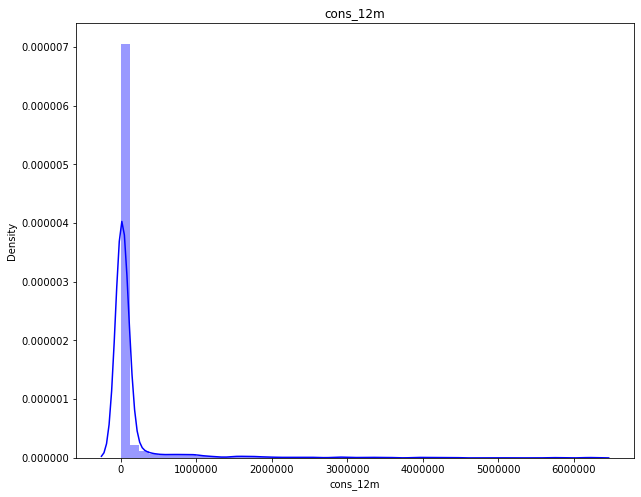

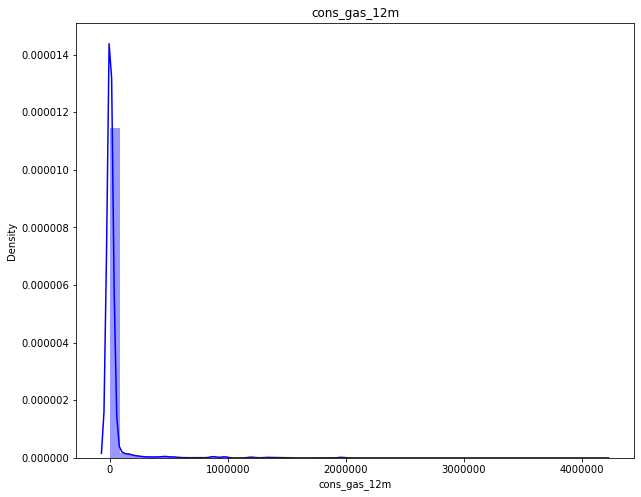

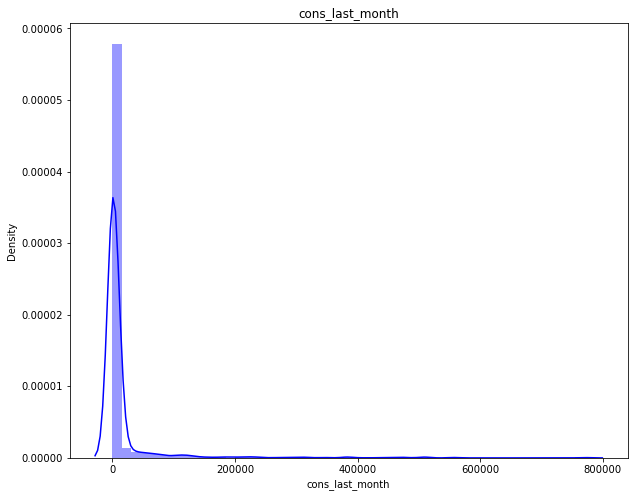

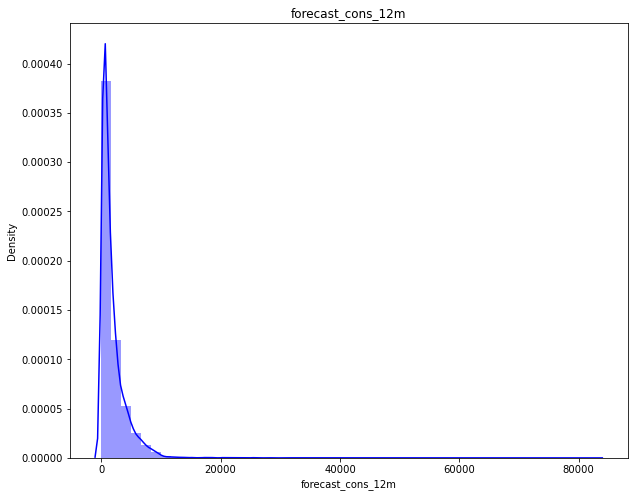

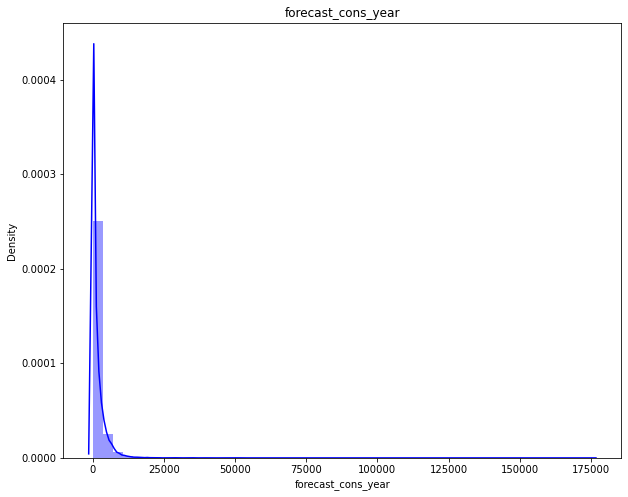

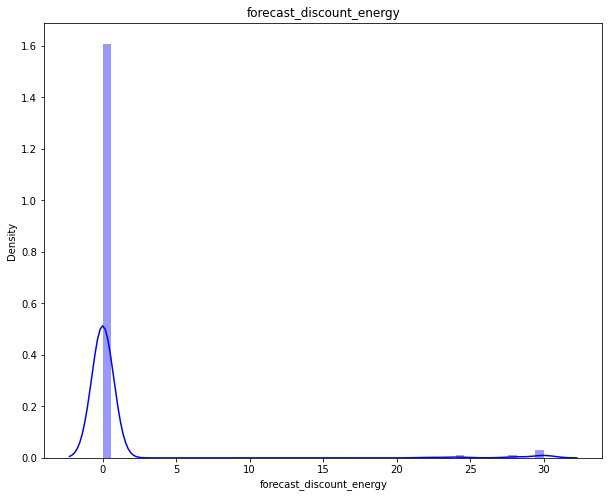

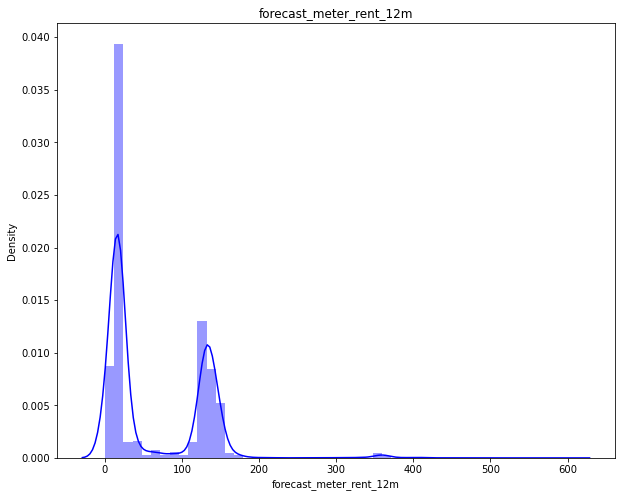

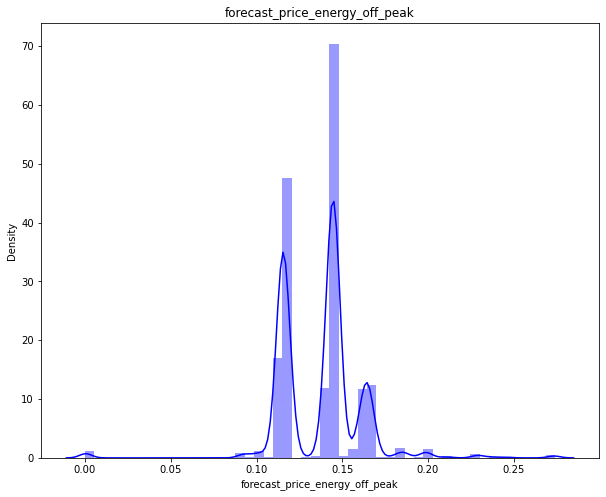

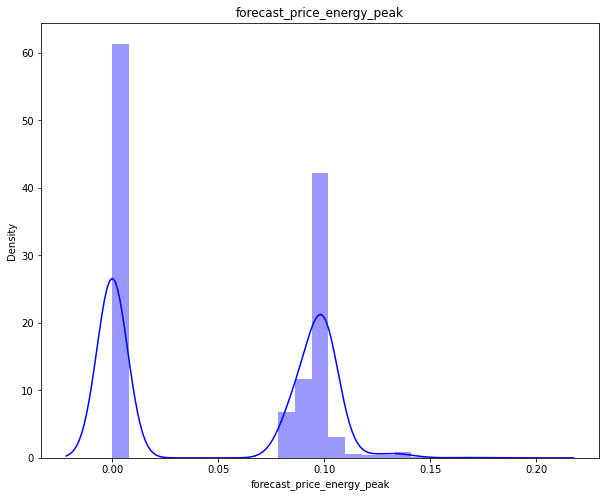

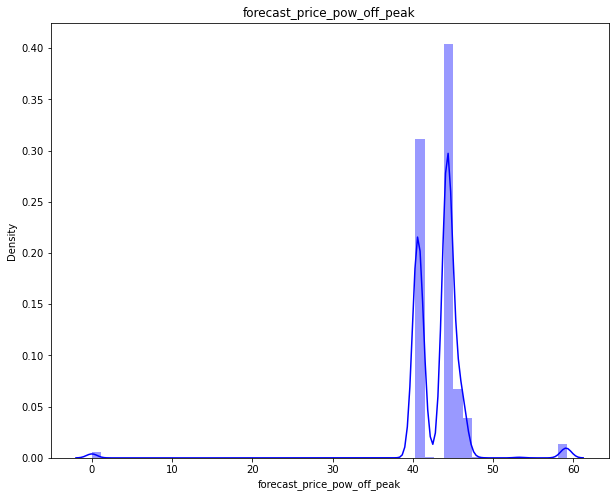

In [28]:
for columns in num_df:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    feature = df[columns]
    sns.distplot(feature, ax = ax, color="blue")
    ax.set_title(columns)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
plt.show()

We can see that the data is not normalized and is highly skewed so we will use Min Max Scaling to normalize the data.

In [29]:
for columns in num_df:
    df[columns] = (df[columns] - df[columns].min()) / (df[columns].max() - df[columns].min())

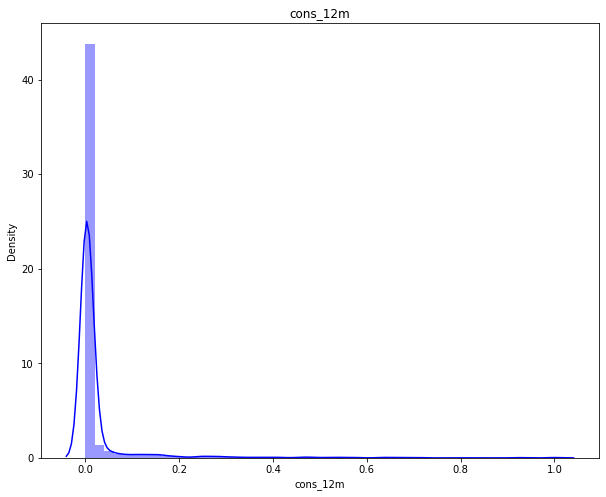

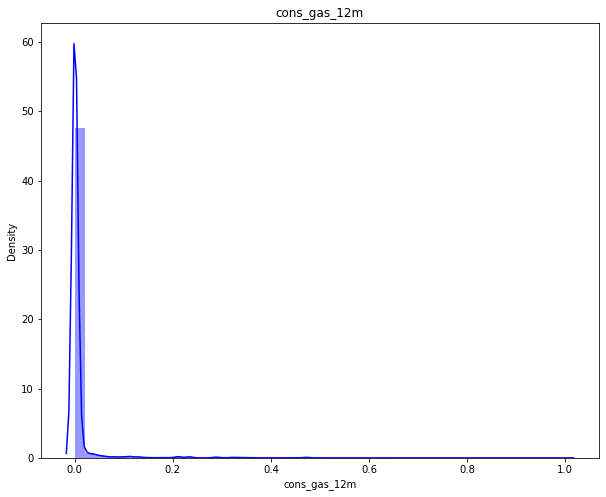

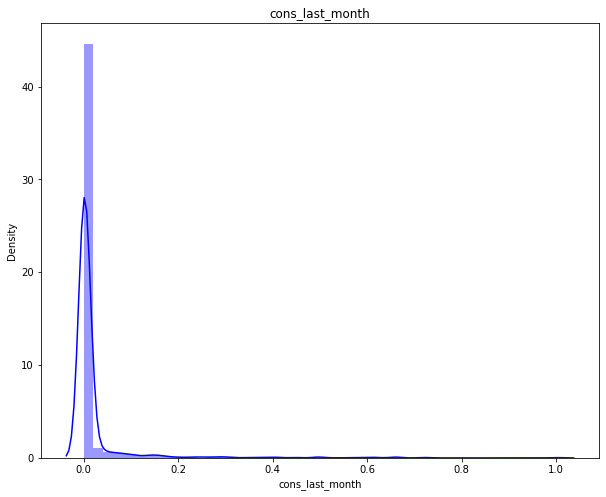

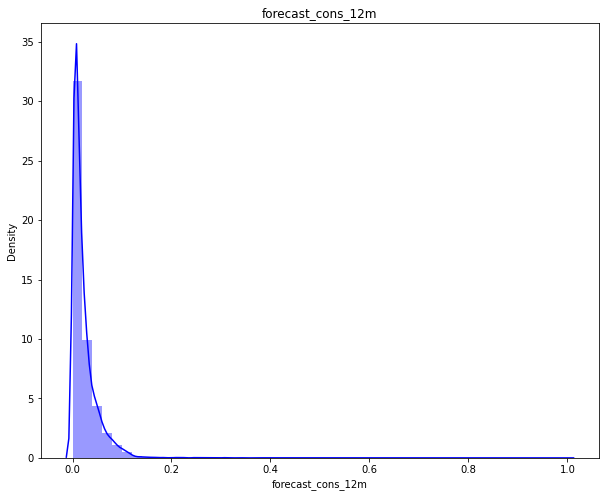

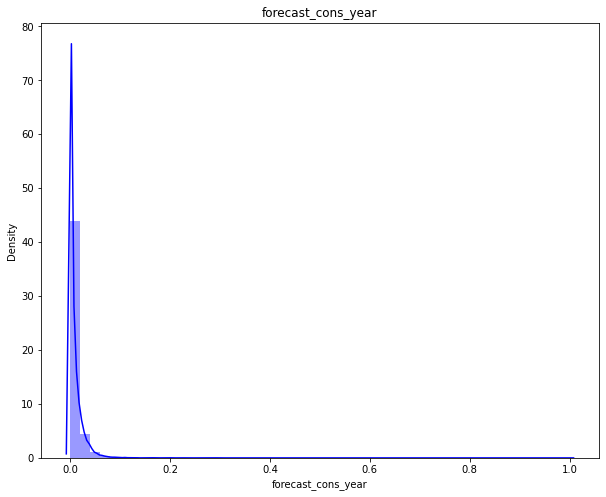

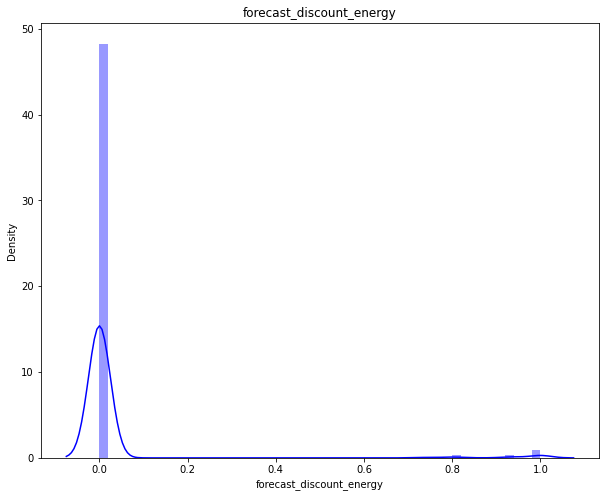

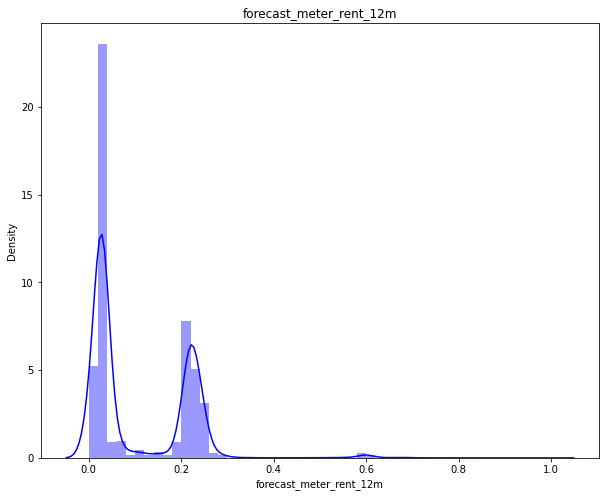

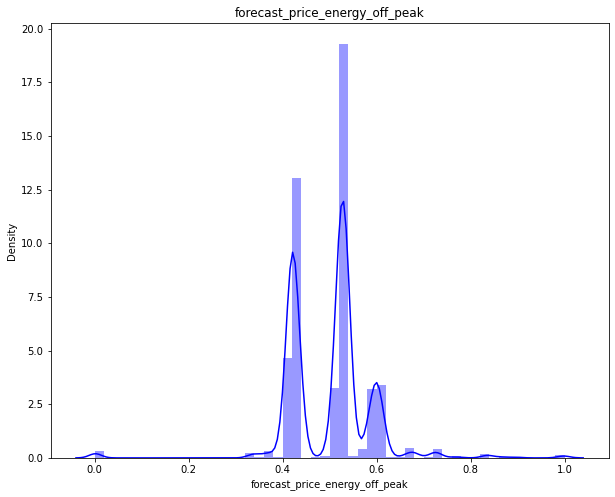

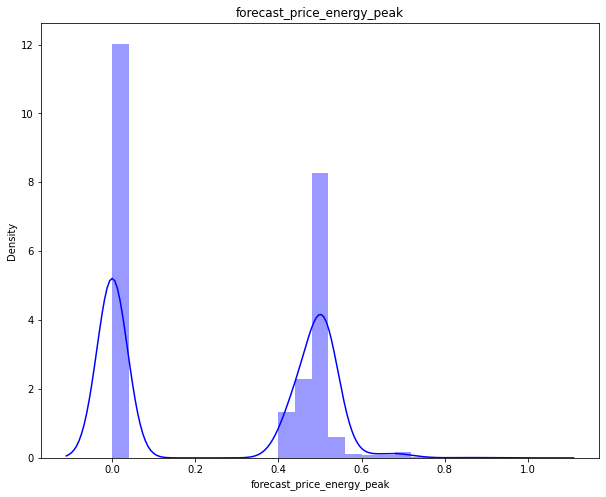

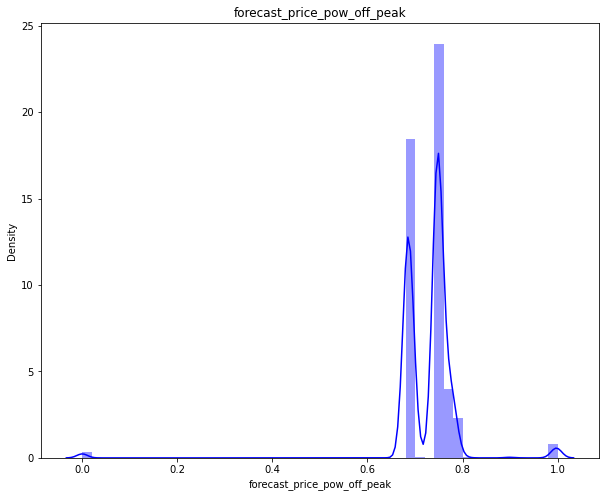

In [30]:
for columns in num_df:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    feature = df[columns]
    sns.distplot(feature, ax = ax, color="blue")
    ax.set_title(columns)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14522.0,0.025718,0.092558,0.000000,0.000914,0.002275,0.006568,1.000000
cons_gas_12m,14522.0,0.006782,0.039325,0.000000,0.000000,0.000000,0.000000,1.000000
cons_last_month,14522.0,0.020914,0.083611,0.000000,0.000000,0.001030,0.004387,1.000000
forecast_cons_12m,14522.0,0.022492,0.028443,0.000000,0.005966,0.013413,0.028943,1.000000
forecast_cons_year,14522.0,0.007955,0.018372,0.000000,0.000000,0.001790,0.009939,1.000000
forecast_discount_energy,14522.0,0.032142,0.170081,0.000000,0.000000,0.000000,0.000000,1.000000
forecast_meter_rent_12m,14522.0,0.105274,0.110326,0.000000,0.026998,0.031378,0.218635,1.000000
forecast_price_energy_off_peak,14522.0,0.501074,0.089896,0.000000,0.424656,0.522574,0.534189,1.000000
forecast_price_energy_peak,14522.0,0.257531,0.250225,0.000000,0.000000,0.428965,0.504335,1.000000
forecast_price_pow_off_peak,14522.0,0.727671,0.075771,0.000000,0.685156,0.747665,0.747665,1.000000


## Feature Selection

In [32]:
correlation = df.corr()

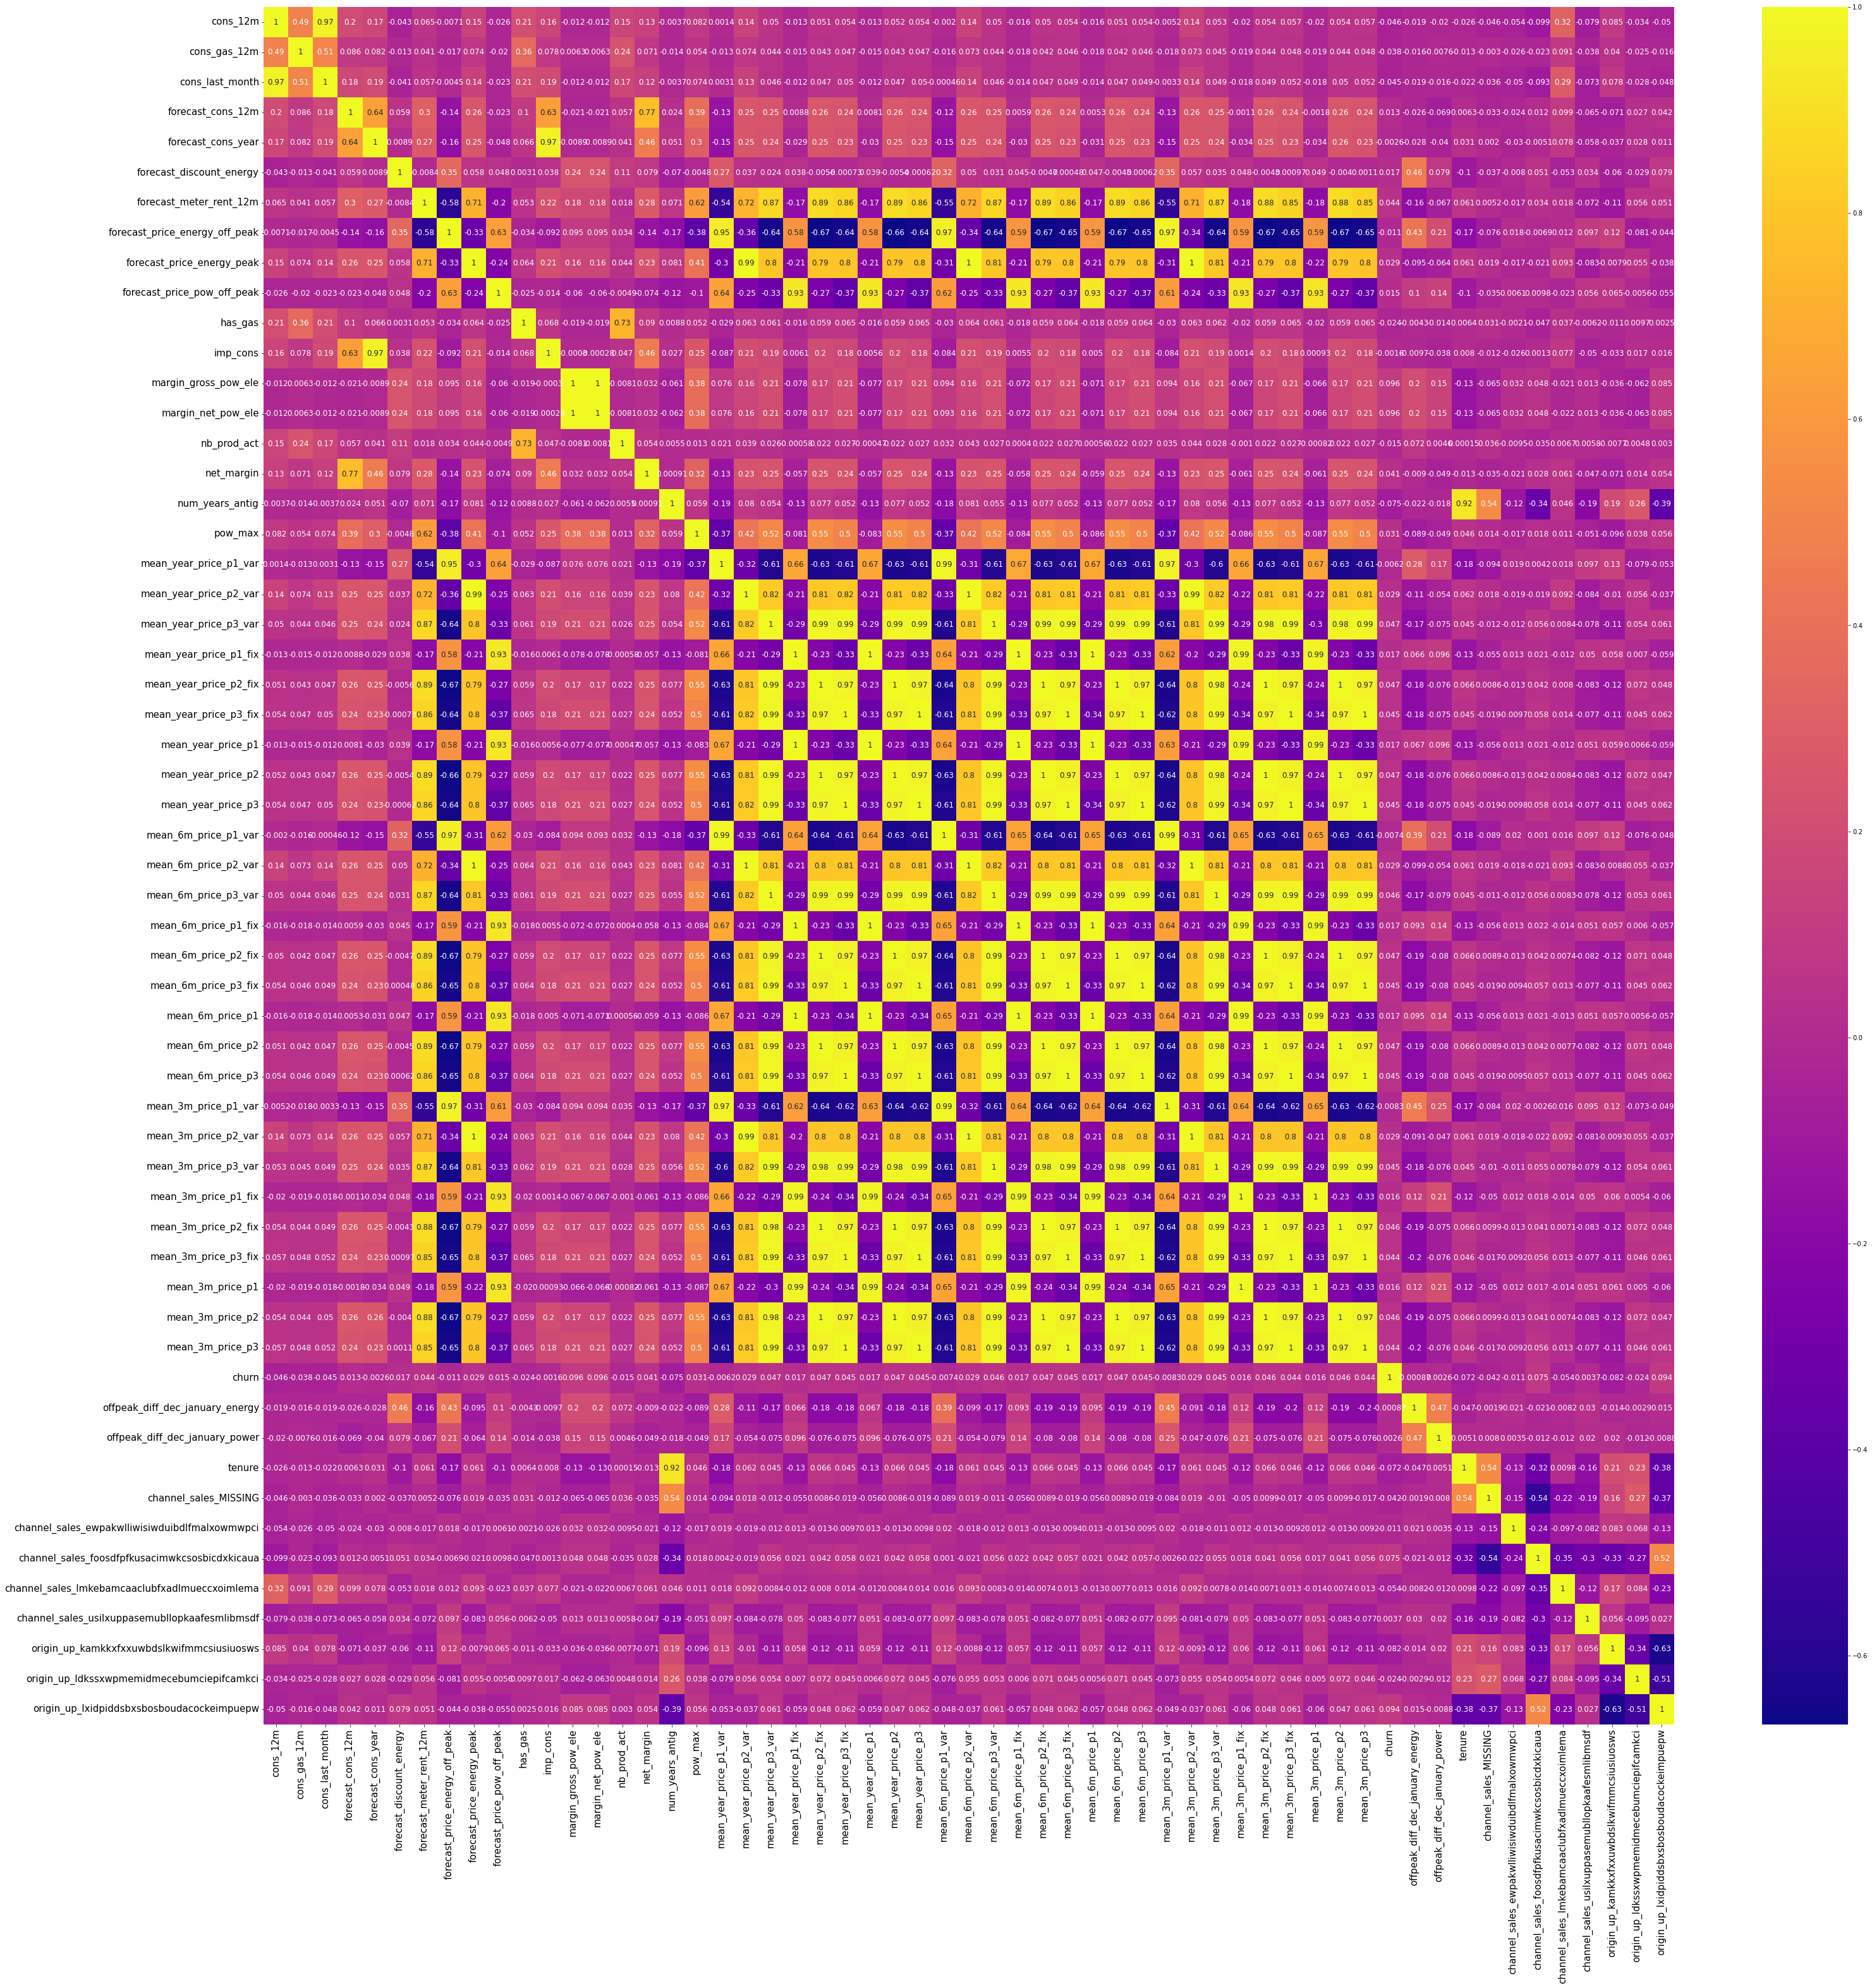

In [33]:
# Plot correlation
plt.figure(figsize=(50, 50))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12},
    cmap='plasma'
)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [34]:
corr_matrix = df.corr().abs()

In [35]:
#high_corr_cols = (corr_matrix > 0.8) & (corr_matrix < 1.0)

In [36]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [37]:
upper

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,offpeak_diff_dec_january_power,tenure,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
cons_12m,NaN,0.488184,0.968179,0.195679,0.167438,0.043283,0.064515,0.007062,0.145874,0.026322,...,0.020019,0.025706,0.046445,0.053761,0.099396,0.317956,0.078636,0.085343,0.033727,0.050137
cons_gas_12m,NaN,NaN,0.506659,0.085854,0.081686,0.012744,0.041106,0.017481,0.073870,0.020252,...,0.007626,0.012531,0.002966,0.026490,0.022899,0.091005,0.038291,0.040103,0.025125,0.015922
cons_last_month,NaN,NaN,NaN,0.179529,0.194258,0.040841,0.056758,0.004536,0.136806,0.022753,...,0.015639,0.022124,0.036420,0.050343,0.092886,0.287184,0.072511,0.077749,0.027854,0.048040
forecast_cons_12m,NaN,NaN,NaN,NaN,0.640651,0.058691,0.304926,0.135884,0.256249,0.022949,...,0.069369,0.006268,0.032953,0.024058,0.012178,0.099256,0.064772,0.070880,0.027198,0.042310
forecast_cons_year,NaN,NaN,NaN,NaN,NaN,0.008851,0.274837,0.158170,0.253183,0.048160,...,0.040031,0.030713,0.002042,0.030275,0.005058,0.077817,0.058108,0.037001,0.028051,0.010682
forecast_discount_energy,NaN,NaN,NaN,NaN,NaN,NaN,0.008371,0.352969,0.058442,0.048300,...,0.079206,0.104521,0.036842,0.008020,0.051136,0.052566,0.034083,0.059677,0.029217,0.078528
forecast_meter_rent_12m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.578866,0.707086,0.204852,...,0.066712,0.061187,0.005237,0.016946,0.033907,0.018141,0.072419,0.106559,0.055843,0.051296
forecast_price_energy_off_peak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330167,0.632718,...,0.207455,0.166156,0.076049,0.017994,0.006889,0.011930,0.096936,0.121203,0.081317,0.043691
forecast_price_energy_peak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.241838,...,0.064493,0.061199,0.018781,0.017195,0.021495,0.092904,0.082920,0.007896,0.055091,0.038148
forecast_price_pow_off_peak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.135676,0.100285,0.034692,0.006149,0.009750,0.023029,0.056290,0.065084,0.005607,0.054794


In [38]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [39]:
to_drop

['cons_last_month',
 'imp_cons',
 'margin_net_pow_ele',
 'mean_year_price_p1_var',
 'mean_year_price_p2_var',
 'mean_year_price_p1_fix',
 'mean_year_price_p2_fix',
 'mean_year_price_p3_fix',
 'mean_year_price_p1',
 'mean_year_price_p2',
 'mean_year_price_p3',
 'mean_6m_price_p1_var',
 'mean_6m_price_p2_var',
 'mean_6m_price_p3_var',
 'mean_6m_price_p1_fix',
 'mean_6m_price_p2_fix',
 'mean_6m_price_p3_fix',
 'mean_6m_price_p1',
 'mean_6m_price_p2',
 'mean_6m_price_p3',
 'mean_3m_price_p1_var',
 'mean_3m_price_p2_var',
 'mean_3m_price_p3_var',
 'mean_3m_price_p1_fix',
 'mean_3m_price_p2_fix',
 'mean_3m_price_p3_fix',
 'mean_3m_price_p1',
 'mean_3m_price_p2',
 'mean_3m_price_p3',
 'tenure']

Dropping the columns who are highly correlated to each other

In [40]:
df_final = df.drop(columns=['cons_last_month',
 'imp_cons',
 'margin_net_pow_ele',
 'mean_year_price_p1_var',
 'mean_year_price_p2_var',
 'mean_year_price_p1_fix',
 'mean_year_price_p2_fix',
 'mean_year_price_p3_fix',
 'mean_year_price_p1',
 'mean_year_price_p2',
 'mean_year_price_p3',
 'mean_6m_price_p1_var',
 'mean_6m_price_p2_var',
 'mean_6m_price_p3_var',
 'mean_6m_price_p1_fix',
 'mean_6m_price_p2_fix',
 'mean_6m_price_p3_fix',
 'mean_6m_price_p1',
 'mean_6m_price_p2',
 'mean_6m_price_p3',
 'mean_3m_price_p1_var',
 'mean_3m_price_p2_var',
 'mean_3m_price_p3_var',
 'mean_3m_price_p1_fix',
 'mean_3m_price_p2_fix',
 'mean_3m_price_p3_fix',
 'mean_3m_price_p1',
 'mean_3m_price_p2',
 'mean_3m_price_p3',
 'tenure'])
df_final.head()

,id,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,0.013225,0.000000,0.000000,0.0,0.002970,0.417870,0.500788,0.685156,...,0.020057,3.700961,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,0.000751,0.000000,0.002291,0.000000,0.0,0.027148,0.531864,0.000000,0.747665,...,-0.003767,0.177779,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,0.000088,0.000000,0.000579,0.000000,0.0,0.064608,0.605169,0.448521,0.747665,...,-0.004670,0.177779,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,0.000255,0.000000,0.002895,0.000000,0.0,0.033088,0.535452,0.000000,0.747665,...,-0.004547,0.177779,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,0.000713,0.000000,0.005377,0.002999,0.0,0.219803,0.426700,0.510346,0.685156,...,-0.006192,0.162916,1,0,0,0,0,1,0,0


## Building the Model

In [41]:
X = df_final.drop(columns=['id', 'churn'])
y = df_final['churn']

In [42]:
y.value_counts()

0    13107
1     1415
Name: churn, dtype: int64

Data is highly imbalance as we have more positive cases then negative. We will use SMOTE library to over sample the data

In [43]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [44]:
y.value_counts()

1    13107
0    13107
Name: churn, dtype: int64

Splitting the data to make train and test set

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
X_train.shape, X_test.shape

((18349, 26), (7865, 26))

In [47]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
    }

In [48]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted) 
    roc_auc = roc_auc_score(true, predicted)
    return acc, f1 , precision, recall, roc_auc

In [49]:
def evaluate_models(X_train, y_train, models):
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)

        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
        print('='*35)
        print('\n')

In [50]:
evaluate_models(X_train,y_train,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9479
- F1 score: 0.9463
- Precision: 0.9847
- Recall: 0.9107
- Roc Auc Score: 0.9482


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8894
- F1 score: 0.8912
- Precision: 0.8843
- Recall: 0.8981
- Roc Auc Score: 0.8893


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9087
- F1 score: 0.9024
- Precision: 0.9652
- Recall: 0.8473
- Roc Auc Score: 0.9085
----------------------------------
Model performance for Test set
- Accuracy: 0.9083
- F1 score: 0.9030
- Precision: 0.9677
- Recall: 0.8464
- Roc Auc Score: 0.9089


Logistic Regression
Model performance for Training 

From the above matrices we can conclude that Random Forest Model is the best among all the models tested so far.

True positives: 3611
False positives: 52
True negatives: 3847
False negatives: 355

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3899
           1       0.99      0.91      0.95      3966

    accuracy                           0.95      7865
   macro avg       0.95      0.95      0.95      7865
weighted avg       0.95      0.95      0.95      7865

Accuracy: 0.9482517482517483
Overall Precision: 0.9858039858039858
Overall Recall: 0.9104891578416541
F1 Score: 0.9466509372132651


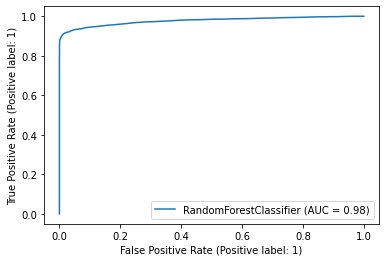

In [51]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(classification_report(y_test, y_pred))

print('Accuracy:', accuracy_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
print("F1 Score:" ,f1_score(y_test, y_pred))

metrics.plot_roc_curve(final_model, X_test, y_test)
plt.show()

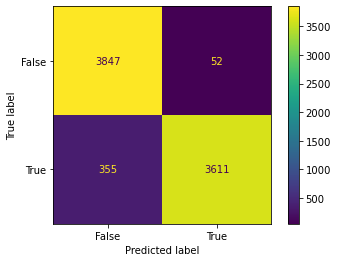

In [52]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Feature Importance

In [53]:
feature_importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index()

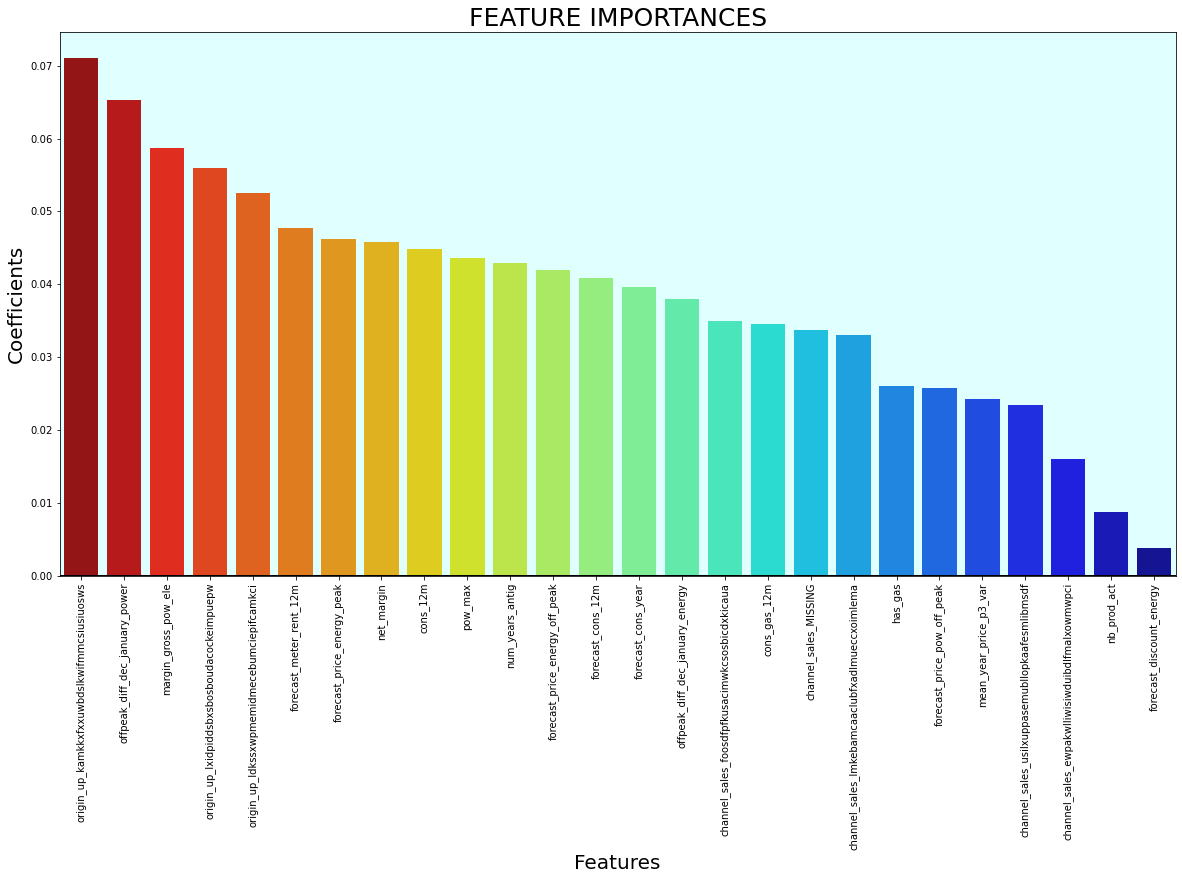

In [54]:
plt.figure(figsize=(20,10))
ax1 = sns.barplot(feature_importances["Features"], feature_importances["Importance"],palette="jet_r", linewidth=2)
ax1.set_facecolor("lightcyan")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("Coefficients", fontsize=20)
plt.xlabel("Features", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('FEATURE IMPORTANCES', fontsize=25)
plt.show()

From The feature importance graph we can observe that orign up that is the code of the electricity campaign the customer first subscribed to is the most contributing feature in the graph. It could be that specific campaign have some promotional code, a set of terms and conditions which are making the companies to churn.

The second most importance feature is offpeak_diff_dec_january_power which is feature that we have created which is equal to the difference between mean of price_off_peak_fix - price_off_peak_fix (price of power for the 1st period (off peak) for the month of January and December. It could be because of the increase in the price of power last month, the companies decided to churn.

The third most importance feature is margin_gross_pow_ele which is gross margin on power subscription. This feature also make sense as the gross margin on power is directly proportional to the price of power. It could be that they increase the price of somwhere to increase gross margin and thats why the companies decided to churn.

In [55]:
import pickle

with open('Task_3_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)